<a href="https://colab.research.google.com/github/m10923039/m10923039_hw01/blob/main/Adult_0410.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **#資料前處理**

In [1]:
#Adult_data.csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.metrics import precision_recall_fscore_support
import tensorflow as tf
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input, Dense, Activation,Dropout

import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/adult.data", header=None)
df


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# 轉成Data Frame格式


In [2]:
df_0=df
df_0.columns=["age",
      "workclass",
      "fnlwgt",
      "education",
      "education_num",
      "marital_status",
      "occupation",
      "relationship",
      "race",
      "sex",
      "capital_gain",
      "capital_loss",
      "hours_per_week",
      "native_country",
      "salary"
             ]
df_0.isnull().sum()


age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
salary            0
dtype: int64

In [3]:
df_4 = df_0


# **資料探索**

#連續資料的資料描述

In [4]:
df_4.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


#確認資料屬性

In [5]:
df_4.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
salary            object
dtype: object

# **確認資料欄位項目**

In [6]:
df_4['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [7]:
df_4['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [8]:
df_4['marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64

In [9]:
df_4['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [10]:
df_4['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [11]:
#race
df_4['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [12]:
#sex
df_4['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [13]:
#native_country
df_4['native_country'].value_counts()


 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [14]:
fliter1 = (df_4["native_country"] != ' ?')
fliter2 = (df_4["occupation"] != ' ?')
fliter3 = (df_4["workclass"] != ' ?')
df_5 = df_4[fliter1 & fliter2 & fliter3]
print(df_5['native_country'].value_counts())
print(df_5['occupation'].value_counts())
print(df_5['workclass'].value_counts())

 United-States                 27504
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 El-Salvador                     100
 India                           100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 Italy                            68
 China                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Columbia                         56
 Poland                           56
 Taiwan                           42
 Iran                             42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

# one-hot encoding(無順序)**粗體文字**

In [15]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_6 = df_5
df_6['workclass'] = labelencoder.fit_transform(df_5['workclass'])
df_6['occupation'] = labelencoder.fit_transform(df_5['occupation'])
df_6['marital_status'] = labelencoder.fit_transform(df_5['marital_status'])
df_6['relationship'] = labelencoder.fit_transform(df_5['relationship'])
df_6['race'] = labelencoder.fit_transform(df_5['race'])
df_6['sex'] = labelencoder.fit_transform(df_5['sex'])
df_6['native_country'] = labelencoder.fit_transform(df_5['native_country'])
df_6['salary'] = labelencoder.fit_transform(df_5['salary'])
df_6


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,5,77516,Bachelors,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,Bachelors,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,HS-grad,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,11th,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,Bachelors,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,Assoc-acdm,12,2,12,5,4,0,0,0,38,38,0
32557,40,2,154374,HS-grad,9,2,6,0,4,1,0,0,40,38,1
32558,58,2,151910,HS-grad,9,6,0,4,4,0,0,0,40,38,0
32559,22,2,201490,HS-grad,9,4,0,3,4,1,0,0,20,38,0


# one-hot encoding(有順序)**粗體文字**

In [16]:
replace_values = {' HS-grad' : 0, ' Some-college' : 1, ' Bachelors' : 2, ' Masters' : 3, ' Assoc-voc' : 4, ' 11th' : 5
                 , ' Assoc-acdm' : 6, ' 10th' : 7, ' 7th-8th' : 8, ' Prof-school' : 9, ' 9th' : 10, ' 12th' : 11
                 , ' Doctorate' : 12, ' 5th-6th' : 13, ' 1st-4th' : 14, ' Preschool' : 15}                                                                                          

df_6=df_6.replace({"education": replace_values})  

print(df_6['education'].value_counts())



0     9840
1     6678
2     5044
3     1627
4     1307
5     1048
6     1008
7      820
8      557
9      542
10     455
11     377
12     375
13     288
14     151
15      45
Name: education, dtype: int64


In [17]:
print(df_6['salary'].value_counts())

0    22654
1     7508
Name: salary, dtype: int64


In [18]:
df_6.describe()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
count,30162.000000,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,2.199324,1.897938e+05,2.419170,10.121312,2.580134,5.959850,1.418341,3.678602,0.675685,1092.007858,88.372489,40.931238,36.382567,0.248922
std,13.134665,0.953925,1.056530e+05,3.162317,2.549995,1.498016,4.029566,1.601338,0.834709,0.468126,7406.346497,404.298370,11.979984,6.105372,0.432396
min,17.000000,0.000000,1.376900e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.000000,1.176272e+05,0.000000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,2.000000,1.784250e+05,1.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,47.000000,2.000000,2.376285e+05,3.000000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,6.000000,1.484705e+06,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


In [19]:
df_6.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary'],
      dtype='object')

# **類神經**

In [20]:

train = df_6
train

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,5,77516,2,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,2,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,0,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,5,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,2,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,6,12,2,12,5,4,0,0,0,38,38,0
32557,40,2,154374,0,9,2,6,0,4,1,0,0,40,38,1
32558,58,2,151910,0,9,6,0,4,4,0,0,0,40,38,0
32559,22,2,201490,0,9,4,0,3,4,1,0,0,20,38,0


In [21]:
# normalize
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train1 = scaler.fit_transform(train)
train2 = pd.DataFrame(train1,columns=train.columns)

In [22]:
train_x = train2.drop('education', axis=1)
train_y = train2['education']

In [23]:

train_x.shape

(30162, 14)

In [24]:

train_y.shape

(30162,)

In [25]:
x = pd.get_dummies(train_x)
y = pd.get_dummies(train_y)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [26]:

input_layer = Input(shape=(x_train.shape[1],))
dense_layer_1 =Dense(32,kernel_initializer=tf.keras.initializers.GlorotNormal() ,activation='relu', name ="nl1" )(input_layer)
dense_layer_2 = Dense(16,kernel_initializer=tf.keras.initializers.GlorotNormal(),activation='relu', name ="nl2" )(dense_layer_1)
dense_layer_2 = Dense(10,activation='relu', name ="nl3" )(dense_layer_2)
dense_layer_2 = Dense(16,activation='relu', name ="nl4" )(dense_layer_2)
dense_layer_2 = Dropout(0.5)(dense_layer_2)
output = Dense(y_train.shape[1],activation='softmax')(dense_layer_2)
model = Model(inputs=input_layer, outputs=output)
model = Model(inputs=input_layer, outputs=output)
model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 14)]              0         
_________________________________________________________________
nl1 (Dense)                  (None, 32)                480       
_________________________________________________________________
nl2 (Dense)                  (None, 16)                528       
_________________________________________________________________
nl3 (Dense)                  (None, 10)                170       
_________________________________________________________________
nl4 (Dense)                  (None, 16)                176       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272 

In [27]:

precision=tf.keras.metrics.Precision(name='precision')
recall=tf.keras.metrics.Recall(name='recall')
accuracy=tf.keras.metrics.Accuracy(name='accuracy')
callback = tf.keras.callbacks.EarlyStopping(monitor='recall',mode='max', patience=5 ,restore_best_weights=True)

Adam = tf.optimizers.Adam(lr=0.003, beta_1=0.9, beta_2=0.997, epsilon=1e-08, decay=0.0)
model.compile(optimizer=Adam, 
        loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
        metrics = [precision,recall,accuracy],
        
              )

history = model.fit(x=x_train, y=y_train,  epochs=20,batch_size =5,
                    validation_data=(x_test, y_test),
                    callbacks=[callback] )

Epoch 1/20
4826/4826 [==============================] - 10s 2ms/step - loss: 1.6544 - precision: 0.6149 - recall: 0.2070 - accuracy: 0.0012 - val_loss: 0.4922 - val_precision: 0.9410 - val_recall: 0.7011 - val_accuracy: 0.0127
Epoch 2/20
4826/4826 [==============================] - 9s 2ms/step - loss: 0.6929 - precision: 0.8364 - recall: 0.6613 - accuracy: 0.1155 - val_loss: 0.2860 - val_precision: 0.9447 - val_recall: 0.8432 - val_accuracy: 0.2421
Epoch 3/20
4826/4826 [==============================] - 8s 2ms/step - loss: 0.6228 - precision: 0.8421 - recall: 0.7134 - accuracy: 0.2790 - val_loss: 0.2203 - val_precision: 0.9854 - val_recall: 0.8734 - val_accuracy: 0.4319
Epoch 4/20
4826/4826 [==============================] - 9s 2ms/step - loss: 0.5796 - precision: 0.8553 - recall: 0.7426 - accuracy: 0.3681 - val_loss: 0.2060 - val_precision: 0.9854 - val_recall: 0.9304 - val_accuracy: 0.5142
Epoch 5/20
4826/4826 [==============================] - 8s 2ms/step - loss: 0.5603 - precision:

# **測試**

In [43]:
df_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/adult.test",header=None)

In [29]:
df_test.columns=["age",
      "workclass",
      "fnlwgt",
      "education",
      "education_num",
      "marital_status",
      "occupation",
      "relationship",
      "race",
      "sex",
      "capital_gain",
      "capital_loss",
      "hours_per_week",
      "native_country",
      "salary"
             ]
df_test

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [30]:
fliter1_test = (df_test["native_country"] != ' ?')
fliter2_test = (df_test["occupation"] != ' ?')
fliter3_test = (df_test["workclass"] != ' ?')
df_test1 = df_test[fliter1_test & fliter2_test & fliter3_test]

In [31]:
df_test1.value_counts

<bound method DataFrame.value_counts of        age      workclass  fnlwgt  ... hours_per_week  native_country   salary
0       25        Private  226802  ...             40   United-States   <=50K.
1       38        Private   89814  ...             50   United-States   <=50K.
2       28      Local-gov  336951  ...             40   United-States    >50K.
3       44        Private  160323  ...             40   United-States    >50K.
5       34        Private  198693  ...             30   United-States   <=50K.
...    ...            ...     ...  ...            ...             ...      ...
16275   33        Private  245211  ...             40   United-States   <=50K.
16276   39        Private  215419  ...             36   United-States   <=50K.
16278   38        Private  374983  ...             50   United-States   <=50K.
16279   44        Private   83891  ...             40   United-States   <=50K.
16280   35   Self-emp-inc  182148  ...             60   United-States    >50K.

[15060 rows

In [32]:
df_test2 = df_test1
df_test2['workclass'] = labelencoder.fit_transform(df_test1['workclass'])
df_test2['occupation'] = labelencoder.fit_transform(df_test1['occupation'])
df_test2['marital_status'] = labelencoder.fit_transform(df_test1['marital_status'])
df_test2['relationship'] = labelencoder.fit_transform(df_test1['relationship'])
df_test2['race'] = labelencoder.fit_transform(df_test1['race'])
df_test2['sex'] = labelencoder.fit_transform(df_test1['sex'])
df_test2['native_country'] = labelencoder.fit_transform(df_test1['native_country'])
df_test2['salary'] = labelencoder.fit_transform(df_test1['salary'])
df_test2
replace_values = {' HS-grad' : 0, ' Some-college' : 1, ' Bachelors' : 2, ' Masters' : 3, ' Assoc-voc' : 4, ' 11th' : 5
                 , ' Assoc-acdm' : 6, ' 10th' : 7, ' 7th-8th' : 8, ' Prof-school' : 9, ' 9th' : 10, ' 12th' : 11
                 , ' Doctorate' : 12, ' 5th-6th' : 13, ' 1st-4th' : 14, ' Preschool' : 15}                                                                                          

df_test2=df_test2.replace({"education": replace_values})  

print(df_test2['education'].value_counts())


0     4943
1     3221
2     2526
3      887
4      652
5      571
6      499
7      403
8      266
9      243
10     221
11     200
12     169
13     161
14      71
15      27
Name: education, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [33]:
df_test2

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,25,2,226802,5,7,4,6,3,2,1,0,0,40,37,0
1,38,2,89814,0,9,2,4,0,4,1,0,0,50,37,0
2,28,1,336951,6,12,2,10,0,4,1,0,0,40,37,1
3,44,2,160323,1,10,2,6,0,2,1,7688,0,40,37,1
5,34,2,198693,7,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,33,2,245211,2,13,4,9,3,4,1,0,0,40,37,0
16276,39,2,215419,2,13,0,9,1,4,0,0,0,36,37,0
16278,38,2,374983,2,13,2,9,0,4,1,0,0,50,37,0
16279,44,2,83891,2,13,0,0,3,1,1,5455,0,40,37,0


In [34]:
df_test3 = scaler.fit_transform(df_test2)
df_test3 = pd.DataFrame(df_test3,columns=df_test2.columns)
df_test3


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,0.109589,0.333333,0.144430,0.333333,0.400000,0.666667,0.461538,0.6,0.50,1.0,0.000000,0.0,0.397959,0.948718,0.0
1,0.287671,0.333333,0.051677,0.000000,0.533333,0.333333,0.307692,0.0,1.00,1.0,0.000000,0.0,0.500000,0.948718,0.0
2,0.150685,0.166667,0.219011,0.400000,0.733333,0.333333,0.769231,0.0,1.00,1.0,0.000000,0.0,0.397959,0.948718,1.0
3,0.369863,0.333333,0.099418,0.066667,0.600000,0.333333,0.461538,0.0,0.50,1.0,0.076881,0.0,0.397959,0.948718,1.0
4,0.232877,0.333333,0.125398,0.466667,0.333333,0.666667,0.538462,0.2,1.00,1.0,0.000000,0.0,0.295918,0.948718,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,0.219178,0.333333,0.156895,0.133333,0.800000,0.666667,0.692308,0.6,1.00,1.0,0.000000,0.0,0.397959,0.948718,0.0
15056,0.301370,0.333333,0.136723,0.133333,0.800000,0.000000,0.692308,0.2,1.00,0.0,0.000000,0.0,0.357143,0.948718,0.0
15057,0.287671,0.333333,0.244762,0.133333,0.800000,0.333333,0.692308,0.0,1.00,1.0,0.000000,0.0,0.500000,0.948718,0.0
15058,0.369863,0.333333,0.047666,0.133333,0.800000,0.000000,0.000000,0.6,0.25,1.0,0.054551,0.0,0.397959,0.948718,0.0


In [35]:
df_test_X = df_test3.drop('education', axis=1)
df_test_y = df_test3['education']

In [36]:
test_X = pd.get_dummies(df_test_X)
test_y = pd.get_dummies(df_test_y)

In [37]:
test_X

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,0.109589,0.333333,0.144430,0.400000,0.666667,0.461538,0.6,0.50,1.0,0.000000,0.0,0.397959,0.948718,0.0
1,0.287671,0.333333,0.051677,0.533333,0.333333,0.307692,0.0,1.00,1.0,0.000000,0.0,0.500000,0.948718,0.0
2,0.150685,0.166667,0.219011,0.733333,0.333333,0.769231,0.0,1.00,1.0,0.000000,0.0,0.397959,0.948718,1.0
3,0.369863,0.333333,0.099418,0.600000,0.333333,0.461538,0.0,0.50,1.0,0.076881,0.0,0.397959,0.948718,1.0
4,0.232877,0.333333,0.125398,0.333333,0.666667,0.538462,0.2,1.00,1.0,0.000000,0.0,0.295918,0.948718,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,0.219178,0.333333,0.156895,0.800000,0.666667,0.692308,0.6,1.00,1.0,0.000000,0.0,0.397959,0.948718,0.0
15056,0.301370,0.333333,0.136723,0.800000,0.000000,0.692308,0.2,1.00,0.0,0.000000,0.0,0.357143,0.948718,0.0
15057,0.287671,0.333333,0.244762,0.800000,0.333333,0.692308,0.0,1.00,1.0,0.000000,0.0,0.500000,0.948718,0.0
15058,0.369863,0.333333,0.047666,0.800000,0.000000,0.000000,0.6,0.25,1.0,0.054551,0.0,0.397959,0.948718,0.0


In [38]:
test_y

,0.000000,0.066667,0.133333,0.200000,0.266667,0.333333,0.400000,0.466667,0.533333,0.600000,0.666667,0.733333,0.800000,0.866667,0.933333,1.000000
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
15056,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
15057,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
15058,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
# 預測
# df_test_y_predicted = model.predict(df_test_X)

In [40]:
preds = model.evaluate(x = test_X, y = test_y)

F1 = 2 * (preds[1] * preds[2]) / (preds[1] + preds[2])
print('Precision', preds[1])
print('Recall', preds[2])
print('F1 Score',F1)

471/471 [==============================] - 1s 1ms/step - loss: 0.1959 - precision: 0.9790 - recall: 0.9365 - accuracy: 0.6482
Precision 0.9790365099906921
Recall 0.9365205764770508
F1 Score 0.957306721063886


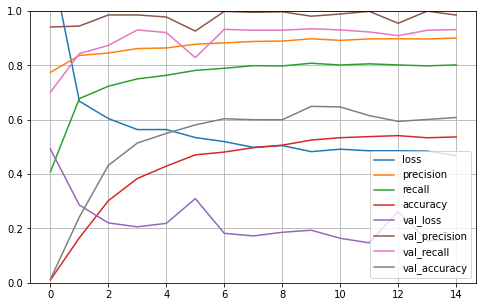

In [41]:
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()